In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
ds.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [8]:
ds.shape

(10000, 10)

In [4]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,10):
        if(numbers_of_selections[i]>0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt((3/2) * math.log( n + 1 ) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad]+=1
    reward = ds.values[n,ad]
    sums_of_rewards[ad] += reward 
    total_reward += reward

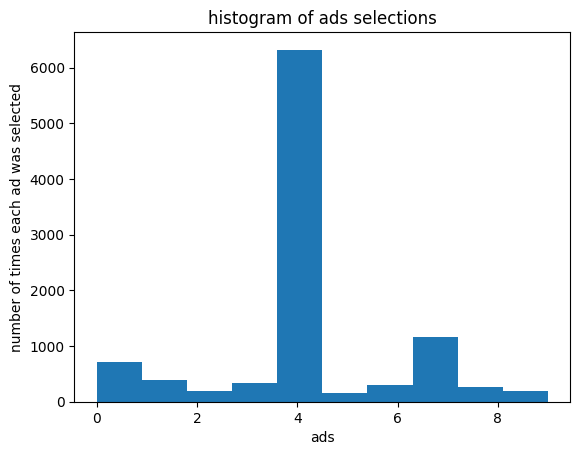

In [5]:
plt.hist(ads_selected)
plt.title('histogram of ads selections')
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()

In [6]:
total_reward

np.int64(2178)